## (b)  Discuss the relationship between data quality, uncertainty, and the challenges of overfitting and underfitting in model learning.


## Presentation
- Model fitting
- Data quality
    - Noise
        - random noise
        - structured noise (shifted data)
    - Data amount
        - The higher the order of the models the more data you would need 
    - Correlation between inputs and outputs. 
        - Trying to predict house prices from location or size
        - (Correlation matrix)
- Uncertainty 
    - Noisy data makes it hard to tell what type of model we should fit
    - Something looks like a 2 order polynomial but if we remove noise is actually just a linear or affine model
- Overfitting vs underfitting
    - Too complex model and you get overfitting
        - Might do well on training data but fails on the test data, as it's highly reliant on the input data it was trained on.
        - Fits exactly to training inputs instead of generalizing over them.
    - Too simple model and you get underfitting
        - Can’t fit the shape of data because it’s too simple (too few model params)
        - Performs poorly on training data and on testing data


# Model Complexity and Overfitting

**Overview**
In this exercise you will experiment with the impact of model complexity (higher order polynomial) and how it relates to Occam's Razor. 


<article class="message">
    <div class="message-body">
        <strong>List of tasks</strong>
        <ul style="list-style: none;">
            <li>
            <a href="#poly_re">Task 1:  Polynomial regression</a>
            </li>
            <li>
            <a href="#occam_train">Task 2: Train and evaluate linear models with po…</a>
            </li>
            <li>
            <a href="#plot_results">Task 3: Plot the polynomials (models)</a>
            </li>
            <li>
            <a href="#reflection">Task 4: Reflection</a>
            </li>
            <li>
            <a href="#Different_data_func">Task 5: Changing the data generating function</a>
            </li>
        </ul>
    </div>
</article>

<div style="float: right; width: 50%; justify-content: start" class="block is-clearfix">

<div class="has-text-centered">
<figure class="image is-inline-block" >

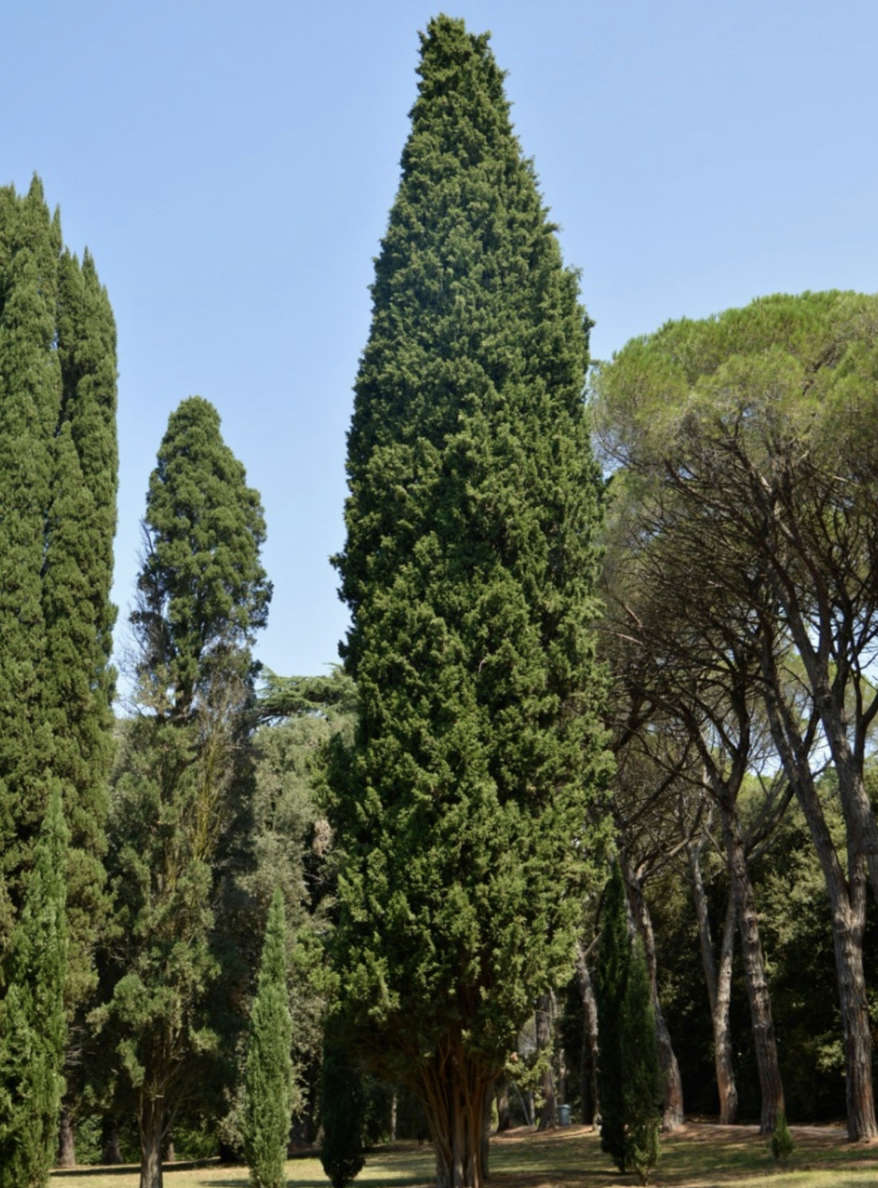


</figure>
</div>


</div>

This exercise is about making a regression model to predict the growth of Thuja Green Giant trees. You have to help the scientists decide which polynomial order best represents the training data to estimate future growth. To determine the optimal fit (model parameters), another group of researchers have provided you with  observation of height of their Thuja Green Giant trees from years later than currently observed by your team (`X_test`
 and `y_test`
). You will use this to choose the optimal model representing the growth of the Thuja Green Giant.
## Data
The following cell constructs and shows the data for the exercise. The data simulates growth (in meters) of one of the fastest growing trees, the Thuja Green Giant, each year. Scientists have observed and reported the growth of the tree for 7 years (`X_train`
 and `y_train`
), and now want to predict the future growth. 
The objective is to assist in making predictions based on this data. Additional data from another group has been provided to validate the hypothesis.
The scientists assume a polynomial relationship. 


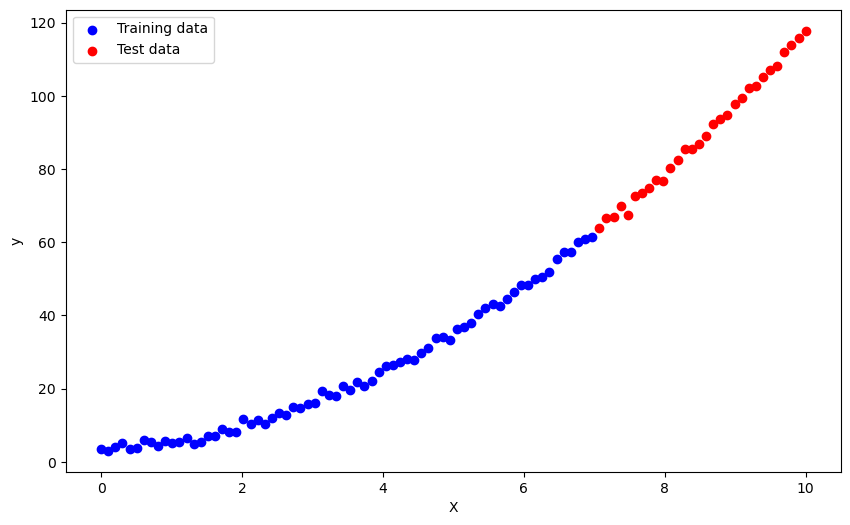

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
# Set a random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
n_samples = 100
X = np.linspace(0, 10, n_samples).reshape(-1, 1)
# y_true = 1.5 * X.ravel() + 0.2
y_true = X.ravel()**2 + 1.5 * X.ravel() + 3
noise = np.random.normal(0, 1, n_samples)
y = y_true + noise

# Split the data into training and test sets
split_index = int(0.7 * n_samples)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]


# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.scatter(X_test, y_test, color='red', label='Test data')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()


---
**Task 1 (easy):  Polynomial regression👩‍💻**
1. In this exercise you may reuse polynomial regression using least squares
 from the previous exercise, or use the `PolynomialFeatures()`
 method from the [scikit-learn library](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)
 to implement the `polynomial_regression()`
 method in the cell below. 


---

In [71]:
def get_design_matrix(X, order):
    """
    Get the coefficients of polynomial in a least square sense of order N.
    
    :param x: Must be numpy array of size (N).
    :order n: Order of Polynomial.
    """
    # print(X)
    if order < 1 or X.ndim != 1:
        return X

    count = X.shape[0]
    matrix = np.ones((count, order + 1), np.float64)

    for i in range(1, order+1):
        matrix[:, i] = X**i

    return matrix

def train(X, y, order):
    """
    :param X: Input vector.
    :param y: Training data values.
    :param order: Order of the model to estimate.
    
    :return: Parameters of model.
    """
    # print(X)
    design = get_design_matrix(X, order)
    # print("design:",design)
    model = np.linalg.lstsq(design, y)
    return model[0]

def polynomial_regression(X, y, degree):
    """
    Create and train a model of desired order and use it to predict the growth of the trees.

    :param X: Vector of combined observed years).
    :param y: Vector of combined observed height.
    :param degree: Degree of the model.
    
    :return: Vector containing prediction for training data, vector containing prediction for test data.
    """
    # print(X)
    return train(X, y, degree)
#write code/solution here ...


---
**Task 2 (easy): Train and evaluate linear models with polynomial features👩‍💻**
1. Use the function `polynomial_regression`
 to perform polynomial regression for each order defined in the `degrees`
 variable and predict the outcome for both the test and training data. 
2. Implement the function `compute_mse`
 that based on the predictions of a model and the ground truth targets returns the _mean-squared-error_.


$$ MSE = \frac{1}{m}\sum_{i=1}^{m}(f_{\mathbf{w}}(x_{i})-y_{i})^2$$

**Hint**
You may save some time by modifying the implementation of the `rmse`
 function from the previous exercise.

3. For each polynomial model calculate the _mean-squared-error_ for both the training and test data (use `polynomial_regression`
 and `compute_mse`
).


---

In [72]:
def predict(X, w, degree):
    """
    :param X: Input vector.
    :param w: Estimated parameters.
    
    :return: Predicted y-values.
    """

    return get_design_matrix(X, degree)@w

def compute_mse(y_true, y_pred):
    """Compute Mean Squared Error between true and predicted values."""
    return np.mean((y_true-y_pred)**2)

# Train and evaluate linear models with different polynomial features

degrees = [1, 2, 3, 4, 5, 6]
train_pred = []
test_pred = []
train_error = []
test_error = []
X_train_flat = X_train[:, 0]
X_test_flat = X_test[:, 0]

#write code/solution here ...
for degree in degrees:
    model = polynomial_regression(X_train_flat, y_train, degree)
    # print(model)
    predicted_test = predict(X_test_flat, model, degree)
    predicted_train = predict(X_train_flat, model, degree)
    train_pred.append(predicted_train)
    test_pred.append(predicted_test)
    train_error.append(compute_mse(y_train, predicted_train))
    test_error.append(compute_mse(y_test, predicted_test))




---
**Task 3 (easy): Plot the polynomials (models)👩‍💻**
Run the cell below to:
1. Plot the data so that training and test data have different colors.
2. Plot the predictions of the polynomial models over the scatter plot showing the given data. Perform this for both the training and test sets using X as input.


---

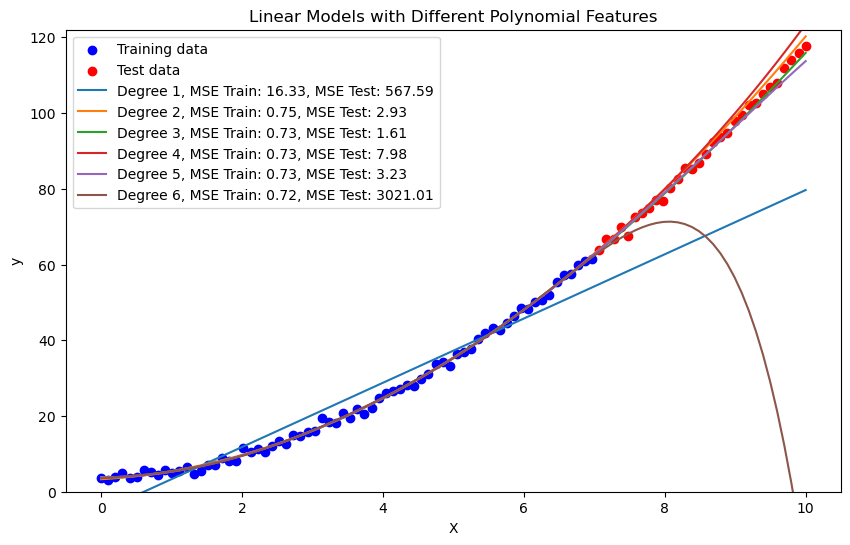

In [76]:
# Plot the results

plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.scatter(X_test, y_test, color='red', label='Test data')

for i, degree in enumerate(degrees):
    plt.plot(X, np.concatenate((train_pred[i],test_pred[i])), label=f'Degree {degree}, MSE Train: {train_error[i]:.2f}, MSE Test: {test_error[i]:.2f}')
plt.xlabel('X')
plt.ylabel('y')
plt.ylim(0,122)
plt.legend()
plt.title('Linear Models with Different Polynomial Features')
plt.show()
# Insert code for question 1
# The following line keep axis fixed in a plot
# plt.ylim(0,30)
# Insert code for question 2


---
**Task 4 (medium): Reflection💡**
Reflect on:
1. Which model had the best performance  on the training data?
2. Which model had the best performance  on the test data?
3. How does the complexity (degree) of the model affect the performance on the training and test data?
4. Which model(s) shows signs of overfitting? How can you tell?


---

In [74]:
# Write reflection here
"""
1) 6. degree

2) 1. degree

3) The higher the degree the lower the mse on the training data but the testing data usually has a larger mse on larger degrees

4) 6. degree, 5. degree, 4. degree

"""

'\n1) 6. degree\n\n2) 1. degree\n\n3) The higher the degree the lower the mse on the training data but the testing data usually has a larger mse on larger degrees\n\n4) 6. degree, 5. degree, 4. degree\n\n'


---
**Task 5 (medium): Changing the data generating function👩‍💻💡**
How do the results change if the underlying function generating the data was changed to a 2. order polynomial, so that it e.g. simulates bacteria growth instead? 
1. Re-generate the data by replacing `y_true`
 with $y=f(x)=x^2+1.5x-3$ in the data generation step, and rerun the other code blocks.
2. Does it still make sense to follow the strategy of Occam's razor?


---

In [ ]:
# Write reflection
"""
1) done

2) not quite, because the best model on the testing data is the 3. degree even tho the underlying function is a 2. degree. (What about Chekhovs gun??!)
"""
